# roc_auc_learning_curve

In [5]:
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn import datasets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)


In [4]:
fpr

array([ 0. ,  0.5,  0.5,  1. ])

In [5]:
tpr

array([ 0.5,  0.5,  1. ,  1. ])

In [6]:
thresholds

array([ 0.8 ,  0.4 ,  0.35,  0.1 ])

In [7]:
metrics.auc(fpr, tpr)


0.75

In [8]:
titanic = sns.load_dataset("titanic")
titanic = titanic.select_dtypes(include=["number"])
titanic.age = titanic.age.fillna(titanic.age.mean())
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
survived    891 non-null int64
pclass      891 non-null int64
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [10]:
titanic_features = titanic.drop("survived", axis=1)
titanic_target = titanic.survived

In [59]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
X_train, X_test, y_train, y_test = model_selection.train_test_split(titanic_features, titanic_target, test_size=0.3)
t_lr = linear_model.LogisticRegression().fit(X_train, y_train)
proba = t_lr.predict_proba(X_test)
predict = t_lr.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, proba[:, 1])
metrics.auc(fpr, tpr), metrics.roc_auc_score(y_test, proba[:, 1])

(0.72904761904761894, 0.72904761904761894)

In [124]:
X_train.shape, X_test.shape

((623, 5), (268, 5))

In [60]:
t_lr.classes_

array([0, 1])

In [123]:
(proba[:, 1] > 0.5).sum(), proba.shape

(59, (268, 2))

In [62]:
fpr.shape, tpr.shape, thresholds.shape

((109,), (109,), (109,))

In [125]:
_fpr, _tpr, _thresholds = metrics.roc_curve(y_test, proba[:, 1], drop_intermediate=False)
_fpr.shape, _tpr.shape, _thresholds.shape, proba.shape[0] - _fpr.shape[0]

((237,), (237,), (237,), 31)

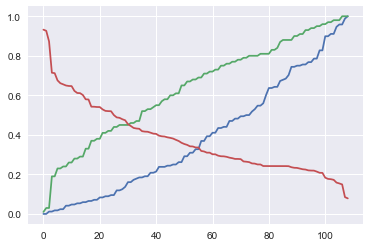

In [113]:
plt.plot(fpr)
plt.plot(tpr)
plt.plot(thresholds)


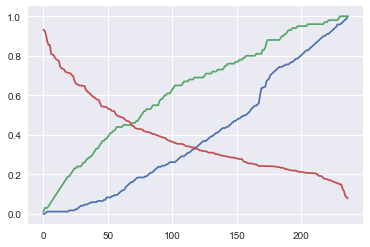

In [120]:
plt.plot(_fpr)
plt.plot(_tpr)
plt.plot(_thresholds)


In [305]:
np.where(np.r_[True,False,True, np.logical_or([1,0,2], [0,1,1])])

(array([0, 2, 3, 4, 5]),)

In [307]:
# 縦軸にTrue Positive、横軸にFalse Positiveの割合
roc_df = pd.DataFrame(np.c_[y_test, proba[:, 1], proba[:, 1] > 0.5])
roc_df.columns = ["y", "proba", "pred"]

roc_df = roc_df.sort_values("proba", ascending=False).reset_index()
roc_df["proba_diff"] = roc_df["proba"].diff()
#roc_df = roc_df.dropna()
roc_df = roc_df[roc_df["proba_diff"] != 0].reset_index(drop=True)
roc_df["tps"] = roc_df["y"].cumsum()
roc_df["fps"] = 1 + roc_df.index - roc_df["tps"]

roc_df["fps_diff"] = roc_df["fps"].diff().diff().shift(-1).fillna(1)
roc_df["tps_diff"] = roc_df["tps"].diff().diff().shift(-1).fillna(1)
roc_df["ps_diff_0"] = (roc_df["fps_diff"] != 0) | (roc_df["fps_diff"] != 0)

drop_intermediate = True
if drop_intermediate and len(roc_df["fps"]) > 2:
    roc_df = roc_df[roc_df["ps_diff_0"]].reset_index(drop=True)
else:
    roc_df["_fpr"] = _fpr
    roc_df["_tpr"] = _tpr
roc_df["tps_norm"] = roc_df["tps"] / roc_df["tps"].max()
roc_df["fps_norm"] = roc_df["fps"] / roc_df["fps"].max()

roc_df
#roc_df.plot(x="fps_norm", y="tps_norm"); plt.plot([0,1], [0,1])


index    y     proba  pred  proba_diff   tps    fps  fps_diff  tps_diff  \
0      99  1.0  0.932104   1.0         NaN   1.0    0.0       1.0       1.0   
1      98  1.0  0.926251   1.0   -0.005853   2.0    0.0       1.0      -1.0   
2      93  0.0  0.872601   1.0   -0.033082   2.0    2.0      -1.0       1.0   
3     257  1.0  0.714187   1.0   -0.002086  18.0    2.0       1.0      -1.0   
4     189  0.0  0.711957   1.0   -0.002230  18.0    3.0      -1.0       1.0   
5     104  1.0  0.675602   1.0   -0.022820  22.0    3.0       1.0      -1.0   
6     163  0.0  0.661268   1.0   -0.014334  22.0    4.0      -1.0       1.0   
7      77  1.0  0.655571   1.0   -0.005697  23.0    4.0       1.0      -1.0   
8     222  0.0  0.649628   1.0   -0.000305  23.0    7.0      -1.0       1.0   
9     182  1.0  0.647242   1.0   -0.001402  25.0    7.0       1.0      -1.0   
10     44  0.0  0.646640   1.0   -0.000602  25.0    8.0      -1.0       1.0   
11     61  1.0  0.622325   1.0   -0.001325  27.0    8.0       1.0      -1.0   
12    195  0.0  0.611768   1.0   -0.010557  27.0    9.0      -1.0       1.0   
13     33  1.0  0.610921   1.0   -0.000847  28.0    9.0       1.0      -1.0   
14    186  0.0  0.601489   1.0   -0.009432  28.0   10.0      -1.0       1.0   
15     51  1.0  0.579769   1.0   -0.008188  32.0   10.0       1.0      -1.0   
16     31  0.0  0.578852   1.0   -0.000917  32.0   11.0      -1.0       1.0   
17    229  1.0  0.542517   1.0   -0.001301  36.0   11.0       1.0      -1.0   
18    187  0.0  0.542236   1.0   -0.000281  36.0   12.0      -1.0       1.0   
19    264  1.0  0.540829   1.0   -0.001406  37.0   12.0       1.0      -1.0   
20    227  0.0  0.540596   1.0   -0.000234  37.0   13.0      -1.0       1.0   
21    190  1.0  0.528790   1.0   -0.000949  40.0   13.0       1.0      -1.0   
22     96  0.0  0.521248   1.0   -0.007542  40.0   14.0      -1.0       1.0   
23      4  1.0  0.520023   1.0   -0.001225  41.0   14.0       1.0      -1.0   
24    220  0.0  0.519490   1.0   -0.000532  41.0   15.0      -1.0       1.0   
25     78  1.0  0.499988   0.0   -0.004243  43.0   15.0       1.0      -1.0   
26    237  0.0  0.488286   0.0   -0.001619  43.0   19.0      -1.0       1.0   
27    204  1.0  0.486151   0.0   -0.002135  44.0   19.0       1.0      -1.0   
28    232  0.0  0.454173   0.0   -0.009898  44.0   25.0      -1.0       1.0   
29    217  1.0  0.444851   0.0   -0.009322  45.0   25.0       1.0      -1.0   
..    ...  ...       ...   ...         ...   ...    ...       ...       ...   
65    166  1.0  0.265476   0.0   -0.011778  76.0   80.0       1.0      -1.0   
66    152  0.0  0.264115   0.0   -0.001362  76.0   81.0      -1.0       1.0   
67     75  1.0  0.262040   0.0   -0.002075  77.0   81.0       1.0      -1.0   
68    141  0.0  0.250243   0.0   -0.002058  77.0   88.0      -1.0       1.0   
69    169  1.0  0.250230   0.0   -0.000013  78.0   88.0       1.0      -1.0   
70     11  0.0  0.242056   0.0   -0.000125  78.0   92.0      -1.0       1.0   
71     83  1.0  0.242043   0.0   -0.000013  79.0   92.0       1.0      -1.0   
72      7  0.0  0.242003   0.0   -0.000040  79.0   93.0      -1.0       1.0   
73    258  1.0  0.241959   0.0   -0.000044  80.0   93.0       1.0      -1.0   
74     25  0.0  0.241939   0.0   -0.000020  80.0   94.0      -1.0       1.0   
75    107  1.0  0.241929   0.0   -0.000010  81.0   94.0       1.0      -1.0   
76      8  0.0  0.236222   0.0   -0.000238  81.0  103.0      -1.0       1.0   
77    225  1.0  0.233435   0.0   -0.000078  83.0  103.0       1.0      -1.0   
78    191  0.0  0.232782   0.0   -0.000653  83.0  104.0      -1.0       1.0   
79      0  1.0  0.229373   0.0   -0.003409  84.0  104.0       1.0      -1.0   
80    221  0.0  0.225902   0.0   -0.003471  84.0  105.0      -1.0       1.0   
81    245  1.0  0.224496   0.0   -0.001351  86.0  105.0       1.0      -1.0   
82     43  0.0  0.220303   0.0   -0.000726  86.0  107.0      -1.0       1.0   
83    192  1.0  0.219365   0.0   -0.000938  87.0  107.

[[152  16]
 [ 57  43]]
[[ 0.56716418  0.05970149]
 [ 0.21268657  0.16044776]]


TP    152
FP     16
FN     57
TN     43
dtype: int64

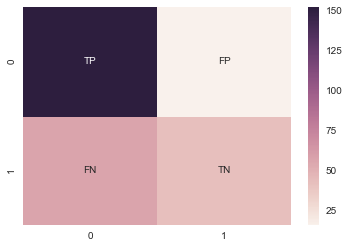

In [154]:
## Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, predict)
print(confusion_matrix)
print(confusion_matrix/ confusion_matrix.sum())
PNTF_labels = np.array([["TP", "FP"], ["FN", "TN"]])
sns.heatmap(confusion_matrix, annot=PNTF_labels, fmt="") #annot=True)
confusion_s = pd.Series(confusion_matrix.flatten(), index=PNTF_labels.flatten())
confusion_s

In [153]:
confusion_matrix.flatten()

array([152,  16,  57,  43])

xy
xは予測した結果、正解/不正解(T/F)
yは予測した結果が正解ならそのまま、不正解なら逆
Pは正例、Nは負例、

- TP
- TN
- FP
- FN

In [159]:
# ROC曲線は，分類器のパラメータを変化させながら，縦軸に TP/TP+FN，横軸に FP/FP+TN をとった曲線．
_cfs = confusion_s
[
    _cfs["TP"] / (_cfs["TP"] + _cfs["FN"]), # 正解は正のうち、ただしく予測できた割合(再現率: recall)
    _cfs["FP"] / (_cfs["FP"] + _cfs["TN"]), # 正解は負のうち、間違って予測した割合
    _cfs["TP"] / (_cfs["TP"] + _cfs["FP"]), # 正と予測したデータのうち，実際に正であるものの割合（精度、適合率、Precsion）
    (_cfs["TP"] + _cfs["TN"]) / _cfs.sum(), # 予測正解率
]


[0.72727272727272729,
 0.2711864406779661,
 0.90476190476190477,
 0.72761194029850751]

In [145]:
_cfmx.loc["T"].sum(), _cfmx.sum()


(168, P    209
 N     59
 dtype: int64)

In [87]:
print(metrics.classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.73      0.90      0.81       168
          1       0.73      0.43      0.54       100

avg / total       0.73      0.73      0.71       268



In [73]:
## ROC曲線

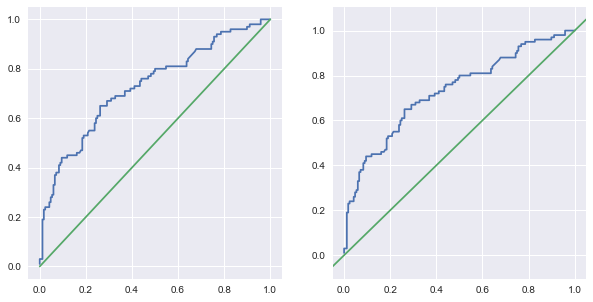

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(fpr, tpr, [0,1],[0,1])
#plt.plot(tpr, fpr, [0,1],[0,1])

pd.Series(tpr, index=fpr).plot(ax=ax2)
pd.Series([-0.05, 0, 1, 1.05], index=[-0.05, 0,1, 1.05]).plot(ax=ax2)


In [160]:
## 正解率
[
    metrics.accuracy_score(y_test, predict),
    (y_test == (proba[:, 1] > 0.5).astype(int)).sum() / y_test.shape[0]
]

[0.72761194029850751, 0.72761194029850751]

In [8]:
# learning curve
# http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb


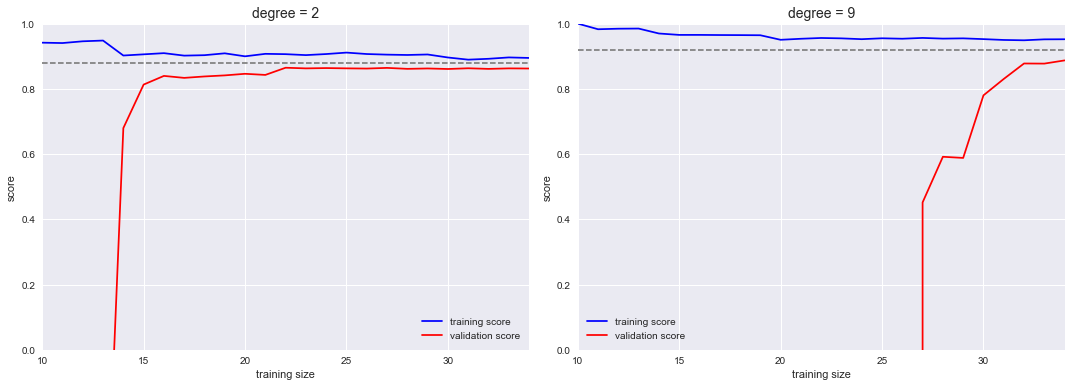

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

degrees = [2, 9]
for degree, ax in zip(degrees, axes):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax.set_ylim(0, 1)
    ax.set_xlim(N[0], N[-1])
    ax.set_xlabel('training size')
    ax.set_ylabel('score')
    ax.set_title('degree = {0}'.format(degree), size=14)
    ax.legend(loc='best')

In [9]:
# validation curve

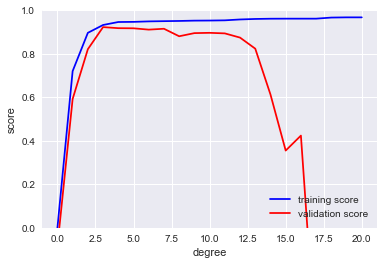

In [11]:
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');